In [20]:
import json

books = []

with open('../data/found_books_filtered.ndjson', 'r') as fin:
    for l in fin:
        books.append(json.loads(l))
        
books = [book for book in books if 'Wikipedia:' not in book[0]]
print(f'Found {len(books)} books.')

Found 37020 books.


In [21]:
for book in books:
    if book[0].startswith('The Better Angels'):
        break

In [22]:
book[0], book[2][:10]

('The Better Angels of Our Nature',
 ['Steven Pinker',
  'Steven Pinker',
  'Nation state',
  'commerce',
  'literacy',
  'Influence of mass media',
  'Rationality',
  "Abraham Lincoln's first inaugural address",
  'nature versus nurture',
  'Leviathan'])

In [23]:
from itertools import chain
from collections import Counter, OrderedDict

def count_items(l):
    """Return ordered dictionary of counts of objects in `l`"""
    
    # Create a counter object
    counts = Counter(l)
    
    # Sort by highest count first and place in ordered dictionary
    counts = sorted(counts.items(), key = lambda x: x[1], reverse = True)
    counts = OrderedDict(counts)
    
    return counts

In [24]:
# Find set of wikilinks for each book and convert to a flattened list
unique_wikilinks = list(chain(*[list(set(book[2])) for book in books]))
wikilinks = [link.lower() for link in unique_wikilinks]

wikilink_counts = count_items(wikilinks)
list(wikilink_counts.items())[:10]

[('paperback', 8740),
 ('hardcover', 8648),
 ('wikipedia:wikiproject books', 6043),
 ('wikipedia:wikiproject novels', 6016),
 ('science fiction', 5665),
 ('english language', 4248),
 ('united states', 3063),
 ('novel', 2983),
 ('the new york times', 2742),
 ('fantasy', 2003)]

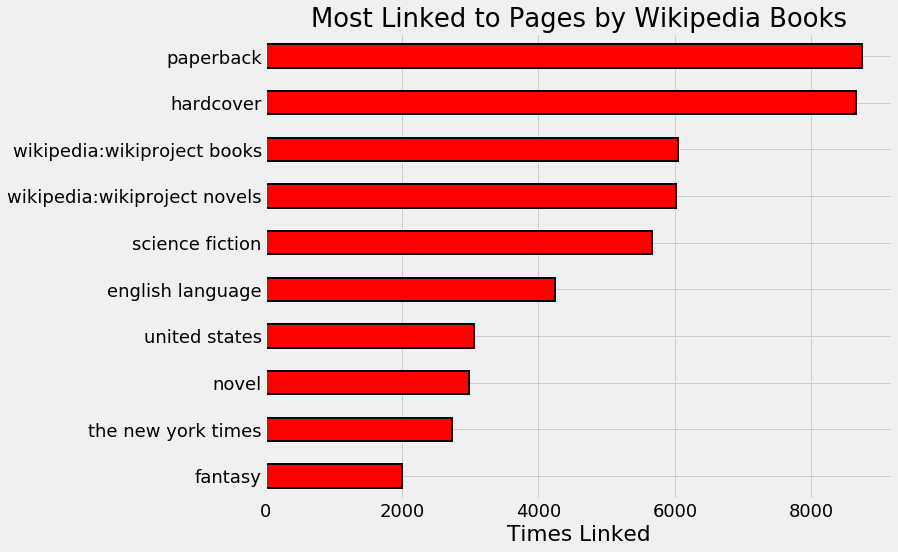

In [25]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

plt.style.use('fivethirtyeight')
plt.rcParams['font.size'] = 18

most_linked = pd.DataFrame({'count': [x[1] for x in list(wikilink_counts.items())[:10]]},
                           index = [x[0] for x in list(wikilink_counts.items())[:10]])

most_linked['count'].plot.barh(color = 'r', edgecolor = 'k', 
                               linewidth = 2, figsize = (10, 8))
plt.title("Most Linked to Pages by Wikipedia Books"); plt.xlabel("Times Linked")
plt.gca().invert_yaxis()

In [26]:
book_index = {book[0]: idx for idx, book in enumerate(books)}

In [27]:
# Find set of book wikilinks for each book
unique_wikilinks_books = list(chain(*[list(set(link for link in book[2] if link in book_index.keys())) for book in books]))

# Count the number of books linked to by other books
wikilink_book_counts = count_items(unique_wikilinks_books)
list(wikilink_book_counts.items())[:10]

[('The Encyclopedia of Science Fiction', 127),
 ('The Discontinuity Guide', 104),
 ('The Encyclopedia of Fantasy', 63),
 ('Dracula', 55),
 ('Encyclopædia Britannica', 51),
 ('Nineteen Eighty-Four', 51),
 ('Don Quixote', 49),
 ('The Wonderful Wizard of Oz', 49),
 ("Alice's Adventures in Wonderland", 47),
 ('Jane Eyre', 39)]

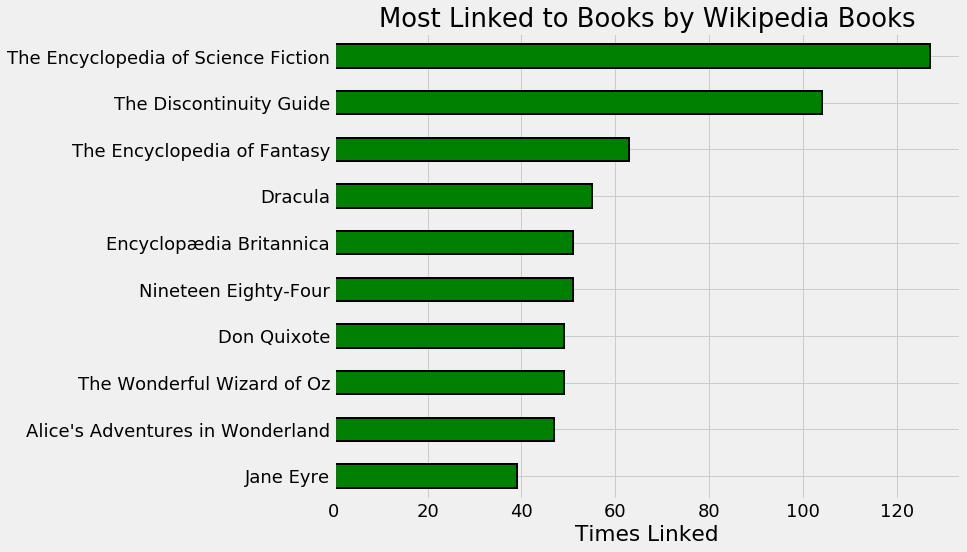

In [29]:
most_linked_books = pd.DataFrame({'count': [x[1] for x in list(wikilink_book_counts.items())[:10]]},
                           index = [x[0] for x in list(wikilink_book_counts.items())[:10]])

most_linked_books['count'].plot.barh(color = 'g', edgecolor = 'k', 
                               linewidth = 2, figsize = (10, 8))
plt.title("Most Linked to Books by Wikipedia Books"); plt.xlabel("Times Linked")
plt.gca().invert_yaxis()